In [1]:
# !git clone https://github.com/zoezhou1999/BeautifyBasedOnGAN.git

In [1]:
import os
os.chdir('/content/drive/MyDrive/DLProject/Tuyen/BeautifyBasedOnGAN')

In [2]:
%tensorflow_version 1.x
import tensorflow
# print(tensorflow.__version__)
import os
import misc
import numpy as np
import pdb
from config import EasyDict
import tfutil
import argparse

from random import gauss

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf

tf.reset_default_graph()
init=tf.global_variables_initializer()

sess = tf.InteractiveSession()
sess.run(init)

default = tf.get_default_session()
default == None # True

False

In [8]:
import tensorflow as tf
tf.reset_default_graph()
sess = tf.Session()
print(tf.get_default_session()==None)

AttributeError: ignored

In [4]:
dir = '/content/drive/MyDrive/DLProject/Tuyen/BeautifyBasedOnGAN/beholder-id.pkl'
network_pkl = misc.locate_network_pkl(dir)
print('Loading network from "%s"...' % network_pkl)
G, D, Gs = misc.load_network_pkl(dir, None)

Loading network from "/content/drive/MyDrive/DLProject/Tuyen/BeautifyBasedOnGAN/beholder-id.pkl"...










In [ ]:
type(Gs)

tfutil.Network

In [23]:
def gen_some_img(n_img = 10, start = 0.2, n_levels = 10, step = 0.2):
  imgList = []
  latentList = []
  for j in range(n_img):
    print('Person number = ', j)

    latents = misc.random_latents(1, Gs, random_state=np.random.RandomState(j))

        # if classification asked, perform conditioning using classification vector
    argslabels_size = 60
    np.random.seed(j)
    vector = [gauss(0, 1) for j in range(512)]
    mag = sum(x ** 2 for x in vector) ** .5
    id_vectors=[x/mag for x in vector]
    id_vectors = np.expand_dims(np.array(id_vectors, dtype=np.float32),axis=0)

    # for i in range(argslabels_size):
    for i in range(n_levels):      
    # initiate conditioned label
      labels = np.ones([1, argslabels_size], np.float32)*(start+i*step)
      # labels = np.random.uniform(start-0.2+i*step,start+0.2+i*step, argslabels_size).reshape(1, -1)
      # if i == 0:
      #   labels = np.random.uniform(0,2, argslabels_size).reshape(1, -1)
      # elif i == 1:
      #   labels = np.random.uniform(1.4,1.6, argslabels_size).reshape(1, -1)
      # else:
      #   labels = np.ones([1, argslabels_size], np.float32)*1.5
      #   for x in range(labels.shape[1]):
      #     if x<30:
      #       labels[0,x] = 0
      #     else:
      #       labels[0,x] = 3
      # vector = [gauss(0, 1) for j in range(512)]
      # mag = sum(x ** 2 for x in vector) ** .5
      # id_vectors=[x/mag for x in vector]
      # id_vectors = np.expand_dims(np.array(id_vectors, dtype=np.float32),axis=0)
      combined_labels = np.hstack((labels, id_vectors)).astype(np.float32)
      
      # infer conditioned noise to receive image
      image = Gs.run(latents, combined_labels, minibatch_size=1, num_gpus=1, out_mul=127.5, out_add=127.5, out_shrink=1, out_dtype=np.uint8)
      #image = Gs.run(latents, labels, minibatch_size=1, num_gpus=0, out_mul=127.5, out_add=127.5, out_shrink=1, out_dtype=np.uint8)

      # save generated image as 'i.png' and noise vector as noise_vector.txt
      # misc.save_image_grid(image, os.path.join(result_subdir, '{}_{}.png'.format('%04d' % j,i)), [0,255], [1,1])
      
      # save latent space for later use
      # np.save(os.path.join(result_subdir,'latents_vector.npy'), latents)
      imgList.append(image)
      latentList.append(latents)
      # print('Image number = ', j)
      print('Beauty score = ', ((start+i*step)*4)+1)
      plt.subplots()
      img2 = image[0].transpose(1,2, 0)
      plt.imshow(img2)
      plt.show()
  return imgList, latentList

Person number =  0
Beauty score =  13.0


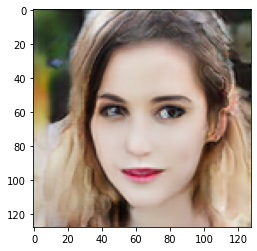

Beauty score =  14.0


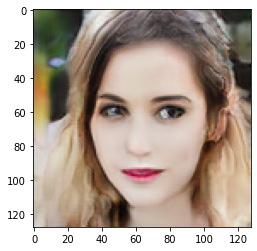

Beauty score =  15.0


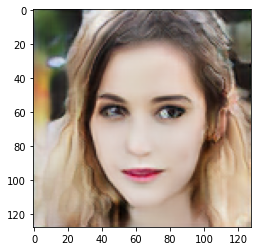

Beauty score =  16.0


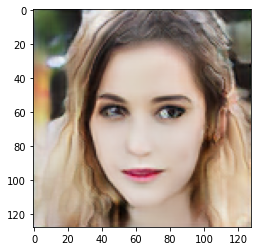

Beauty score =  17.0


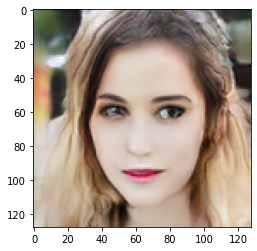

In [24]:
import matplotlib.pyplot as plt
imList, latentList = gen_some_img(1, n_levels=5, start = 3, step=0.25)


In [ ]:
type(imList)

list

In [ ]:
import pickle


with open('imagefile.data', 'wb') as filehandle:
    # store the data as binary data stream
    pickle.dump(imList, filehandle)

In [ ]:
import pickle

with open('imagefile.data', 'rb') as filehandle:
    # read the data as binary data stream
    a = pickle.load(filehandle)

In [ ]:
img2.shape

(128, 128, 3)

In [27]:
import imageio
imageio.imwrite('filename.jpg', img2)

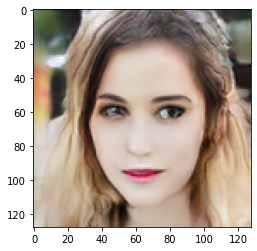

In [26]:
import matplotlib.pyplot as plt
img2 = imList[4][0].transpose(1,2, 0)
plt.imshow(img2)
plt.show()


In [ ]:
import imageio

def get_image(file_name, img_to_get):
  with open(file_name, 'rb') as filehandle:
    # read the data as binary data stream
    a = pickle.load(filehandle)
  for i in img_to_get:
    for j in range(1, 6):
      imageio.imwrite('/content/drive/MyDrive/DLProject/Tuyen/BeautifyBasedOnGAN/imageReport/' +'person_' + str(i) + '_face_' + str(j) + '_.jpg', a[i * 5 + j - 1][0].transpose(1,2, 0))





In [ ]:
k = [0, 2, 4, 5, 9, 12, 13, 14, 17, 19, 24, 21, 22, 23, 25, 28, 31, 33, 38, 41, 44, 55, 42, 57]

In [ ]:
get_image('imagefile.data', k)

In [ ]:
ls

AM946.jpg              feature_extract.py        misc.py
AM949.jpg              feature_visualization.py  networks.py
beautify_image-old.py  ffhq_dataset/             output/
beautify_image.py      filename.jpg              __pycache__/
beauty_prediction/     gender.npy                README.md
beholder-id.pkl        identity_prediction/      requirements-pip.txt
CM646.jpg              id_features.npy           run_metrics.py
command.ipynb          imagefile.data            save_image.txt
config.py              imageReport/              selectimages.py
dataset.py             image_save.json           test.py
dataset_tool-old.py    inference_cond.py         tfutil.py
dataset_tool.py        label_ffhq.py             train-old.py
dnnlib/                legacy.py                 train.py
docs/                  loss.py                   tsne.py
encoder/               metrics/                  utils/
eyeglasses.npy         metrics_evaluation/       util_scripts.py


In [ ]:
i = 5
str(i) + 'txt'

'5txt'

In [ ]:
id_vectors.shape

(1, 512)

In [6]:
# features1 = np.random.uniform(0,2, 60).reshape(1, -1)
# features2 = np.random.normal(0,1,512)
# labels=np.hstack([features1,features2]).astype(np.float32)
# labels = labels.reshape(-1,572)
# features1 = np.random.uniform(0,1, 60).reshape(1, -1)
features1 = np.ones(60, dtype = int).reshape(1, -1) * 0.43
vector = [gauss(0, 1) for j in range(512)]
mag = sum(x ** 2 for x in vector) ** .5
id_vectors=[x/mag for x in vector]
id_vectors = np.expand_dims(np.array(id_vectors, dtype=np.float32),axis=0)
labels = np.hstack((features1, id_vectors)).astype(np.float32)

In [5]:
latents = misc.random_latents(1, Gs, random_state=np.random.RandomState(57))

In [ ]:
import matplotlib.pyplot as plt
for image in imList:
  plt.subplots()
  img2 = image[0].transpose(1,2, 0)
  plt.imshow(img2)
  plt.show()

In [9]:
history = Gs.reverse_gan_for_etalons(latents, labels, img, results_dir=dir, dest_dir=des_dir, iters=2001, iterations_to_save=400, learning_rate=0.1, alpha=0.4)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
   2.02219263e-02 -3.93177420e-02  6.89111874e-02 -1.40309408e-02
   6.61631450e-02  6.60425052e-02  3.00467946e-02  3.92625593e-02
   5.07449247e-02 -5.00812642e-02 -7.36166835e-02  3.30850407e-02
   2.09577587e-02 -7.06368238e-02  2.26051323e-02  4.13186988e-03
   2.82842340e-03  4.51090150e-02  1.00382879e-01 -1.89959034e-02
  -4.47520055e-02 -5.29255010e-02  3.66574377e-02  6.24615606e-03
  -1.22654606e-02  7.45436316e-03  7.38550425e-02 -1.31982006e-02
   5.29702753e-02 -1.87285691e-02 -2.57030763e-02  6.06342629e-02
   2.36601965e-03 -4.13882434e-02  1.47687714e-03  4.02541459e-02
  -2.60052830e-03 -2.08106432e-02 -1.28566539e-02 -3.30831371e-02
  -3.60039957e-02 -5.24968319e-02 -6.02982519e-03  1.09581113e-01
   3.75008471e-02  8.52243751e-02 -2.01298650e-02 -1.91427544e-02
  -3.69425006e-02 -9.82004404e-03  5.02937473e-02 -1.21500231e-02
  -6.15340583e-02  2.36604400e-02  1.61935557e-02 -4.03450392e-02
   1.03976279e-01 -

In [8]:
import PIL
from PIL import Image
# upload image and convert to input tensor
img = PIL.Image.open('AM946.jpg')
img = img.resize((128,128), Image.ANTIALIAS)
# img.save(('CM646_new.jpg').split('/')[-1]) # save image for debug purposes
img = np.asarray(img)
img = img.transpose(2, 0, 1)
img = np.expand_dims(img, axis=0)
img = (img / 127.5) - 1.0 # normalization
des_dir = '/content/drive/MyDrive/DLProject/Tuyen/BeautifyBasedOnGAN/output'
# execute algorithm
# history = Gs.reverse_gan_for_etalons(latents, labels, img, results_dir=dir, dest_dir=des_dir, iters=500, iterations_to_save=100, learning_rate=0.1, alpha=0.4)

In [ ]:
from encoder.generator_model import Generator
generator = Generator(Gs, labels_size=572, batch_size=1)#, clipping_threshold=args.clipping_threshold, model_res=args.resolution)

In [ ]:
generated_images = generator.generate_images()

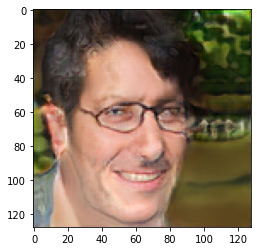

In [ ]:
import matplotlib.pyplot as plt

generated_images.shape
img2 = generated_images[0]
plt.imshow(img2)
plt.show()

In [ ]:
Gs.print_layers()


Gs                          Params      OutputShape             WeightShape             
---                         ---         ---                     ---                     
latents_in                  -           (?, 512)                -                       
labels_in                   -           (?, 572)                -                       
lod                         -           ()                      -                       
4x4/PixelNorm               -           (?, 1084)               -                       
4x4/Dense                   8880640     (512,)                  (1084, 8192)            
4x4/Conv                    2359808     (512,)                  (3, 3, 512, 512)        
ToRGB_lod5                  1539        (3,)                    (1, 1, 512, 3)          
8x8/Conv0_up                2359808     (512,)                  (3, 3, 512, 512)        
8x8/Conv1                   2359808     (512,)                  (3, 3, 512, 512)        
ToRGB_lod4          